## Observations and Insights 

## Initial Analysis:

The pie charts show us that there is an almost equal distribution of Male(51%) vs Female(49%) mice tested after removing all of the duplicated mouse observations. 

The 'Summary Statistics' shows us that the 'Capomulin' and 'Ramicane' drug regimen had the lowest standard deviation from the mean. 

- Capomulin	mean = 40.675741 	standard deviation = 4.994774	
- Ramicane	mean = 40.216745 	standard deviation = 4.846308
- Others    standard deviation from 6.3 to 8.3

As well, both of these drug regimens did not have any outliers, as shown in the boxplot. Thus, the results should not be skewn for these two drug regimens.
The bar chart shows us that Capomulin and Ramicane drug treatments were used the most (over 200 times used) in the study compared to the other drug treatments (under 200 times used).
Thus, these two drug regimines 'Capomulin' and 'Ramicane' will give us a good estimate to make findings in this study.

There is a strong positive correlation (0.84), using the 'Capomulin' drug regimen, between the average mouse size and the average tumor volume, as shown by the scatter plot with the linear equation y=0.95x + 21.55. Generally, as mouse weight increases, the tumor volume will increase for the mice tested with the 'Capomulin' regimen.

The 'Capomulin' treatment in mouse 's185', generally shows that as more treatments were given over time, the volume of the tumor decreased. As seen in graph 'Tumor Treatment Capomulin vs Time Points for Mouse s185'
The most significant changes in the tumor size happened at the 5th to 10th day treatment (approximately from 44 to 37.5 mm3), and then again at the 30 to 35th day treatment (approximately: 34 to 28 mm3) for this mouse.
Thus, the increased time period for this mouse helped significantly reduce the tumor size on this drug regimen.
However, further analysis would be needed to look at more mice and to look at the death rate over time, with this drug regimen on mice.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
from scipy.stats import linregress


# Study data files
mouse_metadata_path = os.path.join('data/Mouse_metadata.csv')
study_results_path = os.path.join('data/Study_results.csv')

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Display mouse meta data
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
#Display study results
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
mouse_obs = pd.merge(left=mouse_metadata,right=study_results, how ='outer',on='Mouse ID')

# Display the data table for preview
mouse_obs.sort_values(by='Mouse ID').head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
459,a203,Infubinol,Female,20,23,25,56.793208,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1


In [4]:
# Checking the number of mice.
mice_count =mouse_obs['Mouse ID'].nunique()
print('# Mice= ' + str(mice_count))
print('# Rows= ' + str(len(mouse_obs)))

# Mice= 249
# Rows= 1893


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dups_IDs = mouse_obs.loc[mouse_obs.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mouse_dups_IDs

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

#shows all data for that mouse ID : mouse ID to be removed later
mouse_with_duplicate = mouse_obs[mouse_obs['Mouse ID'].isin(mouse_dups_IDs)== True]
mouse_with_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_obs_clean= mouse_obs[mouse_obs['Mouse ID'].isin(mouse_dups_IDs)==False]
mouse_obs_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
mice_count =mouse_obs_clean['Mouse ID'].nunique()
print('# Mice= ' + str(mice_count))
print('# Rows= ' + str(len(mouse_obs_clean)))
#should have 13 fewer rows and one less mouse
#1893-1880= 13 rows removed

# Mice= 248
# Rows= 1880


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
#for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tv_mean = mouse_obs_clean['Tumor Volume (mm3)'].groupby(mouse_obs_clean['Drug Regimen']).mean()
tv_median = mouse_obs_clean['Tumor Volume (mm3)'].groupby(mouse_obs_clean['Drug Regimen']).median()
tv_var = mouse_obs_clean['Tumor Volume (mm3)'].groupby(mouse_obs_clean['Drug Regimen']).var()
tv_std = mouse_obs_clean['Tumor Volume (mm3)'].groupby(mouse_obs_clean['Drug Regimen']).std()
tv_sem = mouse_obs_clean['Tumor Volume (mm3)'].groupby(mouse_obs_clean['Drug Regimen']).sem()

dfSummary_stats= pd.DataFrame({"Tumor Volume (mm3) Mean":tv_mean, 
                               "Tumor Volume (mm3) Median":tv_median, 
                               "Tumor Volume (mm3) Variance ":tv_var, 
                               "Tumor Volume (mm3) Standard Deviation":tv_std, 
                               "Tumor Volume (mm3) SEM":tv_sem})


dfSummary_stats

,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
dfSummary_stats2 = mouse_obs_clean.groupby(['Drug Regimen']).agg({
                                            'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
                                             })
dfSummary_stats2                                           

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested 
# for each drug regimen using Pandas.

# Create a group based on the values in the 'Drug Regimen' column
mice_tp_grp = mouse_obs_clean.groupby('Drug Regimen')

# Count how many times each Timepoint appears in our group
mice_tp = mice_tp_grp['Timepoint'].count().sort_values(ascending= False)
mice_tp

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Timepoint, dtype: int64

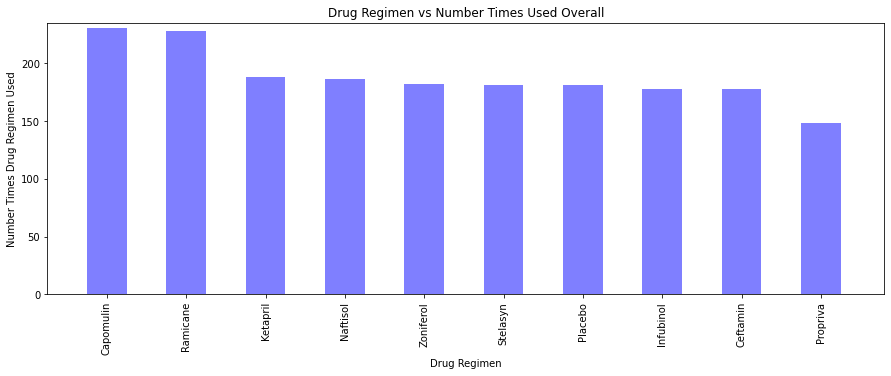

<Figure size 432x288 with 0 Axes>

In [12]:
# Create a bar chart based upon the above data (using Pandas)
plt.figure(figsize=(15,5))
fig = mice_tp.plot.bar(color='b', alpha=0.5, align="center")

# Set the xlabel, ylabel, title 
fig.set_title("Drug Regimen vs Number Times Used Overall")
fig.set_xlabel("Drug Regimen")
fig.set_ylabel("Number Times Drug Regimen Used")

# Set the limits of the x axis
fig.set_xlim(-0.75, len(mice_tp.index.values)-0.20)
# Set the limits of the y axis
fig.set_ylim(0, max(mice_tp.values)+5)

plt.show()
plt.tight_layout()


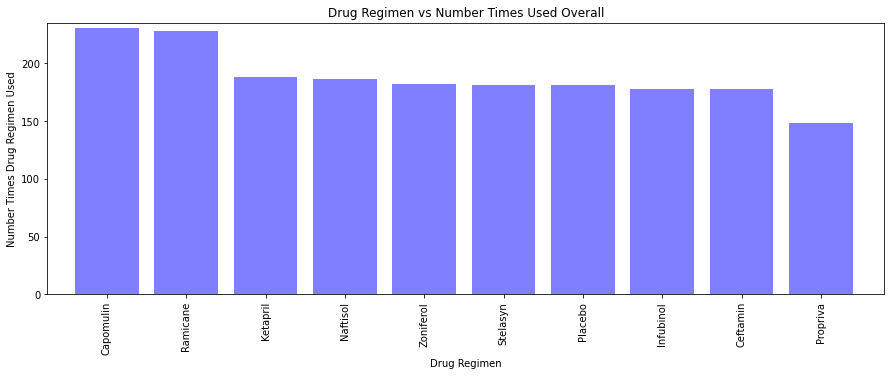

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of timepoints 
plt.figure(figsize=(15,5))
x_axis = mice_tp.index.values
y_axis = mice_tp.values
fig = plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
# Give the chart a title, x label, and y label
fig = plt.title("Drug Regimen vs Number Times Used Overall")
fig = plt.xlabel("Drug Regimen")
fig = plt.ylabel("Number Times Drug Regimen Used")
fig = plt.xticks(rotation="vertical")

# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.20) 
# Set the limits of the y axis
plt.ylim(0, max(mice_tp.values)+5)

plt.show()
plt.tight_layout()

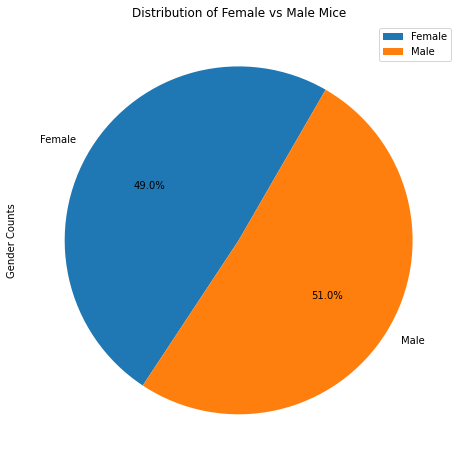

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = mouse_obs_clean.groupby(['Sex'])['Mouse ID'].count()
mice_gender.name ="Gender Counts"
fig = mice_gender.plot.pie(shadow = False, startangle=60,figsize=(10,8),autopct= "%1.1f%%", legend = True,
                           title ="Distribution of Female vs Male Mice")
plt.show()


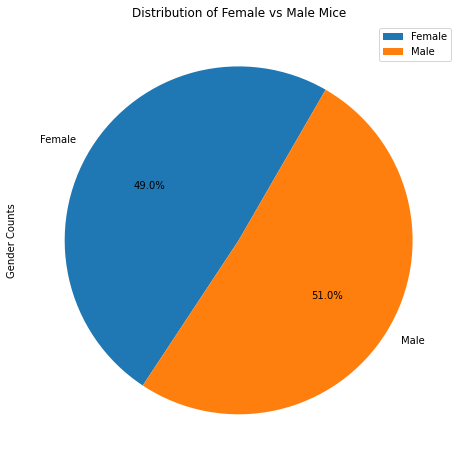

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(10,8))
labels = mice_gender.index
mice_counts = mice_gender.values
plt.pie(mice_counts, labels=labels, autopct="%1.1f%%", shadow=False, startangle=60)
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("Gender Counts")
plt.legend()

plt.show()



## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
gtp = mouse_obs_clean.groupby(['Mouse ID'])['Timepoint'].max()
gtp.rename('Max_Timepoint')
#reset the index to get both Mouse ID and Timepoint
gtp2 =gtp.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Sorted Values by: Drug Regimen','Tumor Volume (mm3)', ascending = True
m_mouse_obs_maxTP = pd.merge(gtp2, mouse_obs_clean, on=['Mouse ID', 'Timepoint'], how='left').sort_values(by=['Drug Regimen','Tumor Volume (mm3)'], ascending = True)
m_mouse_obs_maxTP.head()                                        
                                         

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
174,s185,45,Capomulin,Female,3,17,23.343598,1
121,m601,45,Capomulin,Male,22,17,28.430964,1
226,x401,45,Capomulin,Female,16,15,28.484033,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
192,u364,45,Capomulin,Male,18,17,31.023923,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen_poi = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_plot ={}
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in drug_regimen_poi:
    tumor_vol_data =[]
    outliers=[]
    
    print(f"Quartile Outlier results for drug regimen - {regimen}:")
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_data = m_mouse_obs_maxTP[m_mouse_obs_maxTP['Drug Regimen'] == regimen]['Tumor Volume (mm3)'].reset_index()
    
    # add subset
    tumor_vol_data_plot[regimen]= tumor_vol_data['Tumor Volume (mm3)']
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_data['Tumor Volume (mm3)'].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("")
    outliers = tumor_vol_data[(tumor_vol_data['Tumor Volume (mm3)'] > upper_bound) | (tumor_vol_data['Tumor Volume (mm3)'] < lower_bound)]
    print("OUTLIERS:")
    if len(outliers) == 0:
        print("No outliers.")
    else:
        print(outliers)
    
    print("-------------------------------")
    


#Index the tumor_vol_data_plot into a dataframe to use with a boxplot
tumor_vol_data_plot_df= pd.DataFrame(tumor_vol_data_plot)
    

Quartile Outlier results for drug regimen - Capomulin:
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.

OUTLIERS:
No outliers.
-------------------------------
Quartile Outlier results for drug regimen - Ramicane:
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.

OUTLIERS:
No outliers.
-------------------------------
Quartile Outlier results for drug regimen - Infubinol:
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.

OUTLIERS:
   index  Tumor Volume (mm3)
0     31           36.321346
-------------------------------
Quartile Outlier results for drug regimen - Ceftamin:
Values below 25.35 could be outliers.
Values above 87.67 could be outliers.

OUTLIERS:
No outliers.
-------------------------------


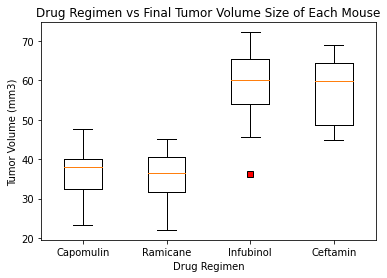

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

red_square = dict(markerfacecolor='r', marker='s')
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen vs Final Tumor Volume Size of Each Mouse')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_vol_data_plot_df)
ax1.boxplot(tumor_vol_data_plot_df, flierprops=red_square)
plt.xticks([1,2,3,4], tumor_vol_data_plot_df.keys())
plt.show()


## Line and Scatter Plots

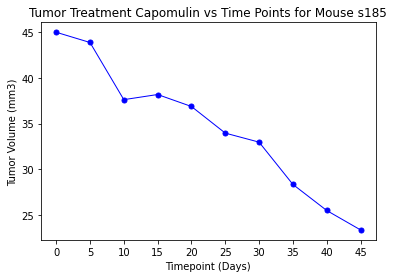

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#get the Capomulin regimen by Mouse ID: s185
df_s185_Capomulin = mouse_obs_clean[(mouse_obs_clean["Drug Regimen"] == "Capomulin") & (mouse_obs_clean["Mouse ID"]=="s185")]

#Set up the line plot and display
x_axis = df_s185_Capomulin["Timepoint"]
tumor_vol = df_s185_Capomulin["Tumor Volume (mm3)"]
plt.xticks(x_axis)
plt.title('Tumor Treatment Capomulin vs Time Points for Mouse s185')
fig = plt.plot(x_axis, tumor_vol,linewidth=1, markersize=5,marker="o",color="blue")
fig = plt.xlabel('Timepoint (Days)')
fig = plt.ylabel('Tumor Volume (mm3)')


plt.show()


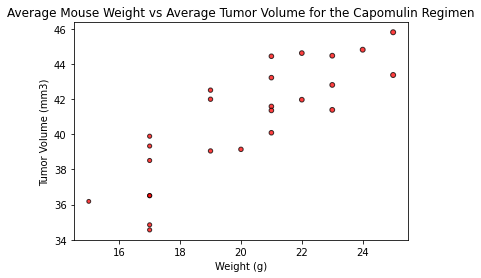

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#get Capomulin regimen
dfCapomulin = mouse_obs_clean[mouse_obs_clean["Drug Regimen"] == "Capomulin"]
#get the means by Mouse ID
dfVol_Weight =dfCapomulin.groupby(['Mouse ID']).mean()
#set the axis
avg_weight = dfVol_Weight['Weight (g)']
avg_vol =dfVol_Weight['Tumor Volume (mm3)']
#plot
fig = plt.scatter(avg_weight, avg_vol, marker="o", facecolors="red", edgecolors="black",
             s=avg_weight, alpha=0.75)
fig = plt.title('Average Mouse Weight vs Average Tumor Volume for the Capomulin Regimen')
fig = plt.xlabel('Weight (g)')
fig = plt.ylabel('Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cor = st.pearsonr(avg_weight,avg_vol)
print(f"The correlation between mouse weight and the average tumor volume is {round(cor[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


The r-squared is: 0.709


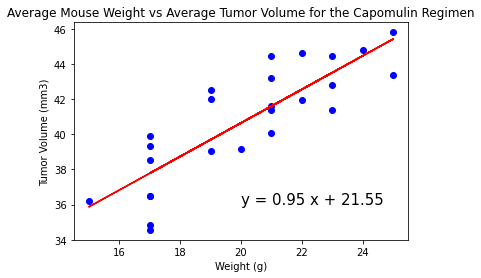

In [22]:
# linear regression calculate
(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_weight,avg_vol)
#map to y = mx + b, these are values calc. by model
# string format to show
regress_values= avg_weight * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
#plot
plt.scatter(avg_weight,avg_vol,color='b')
plt.plot(avg_weight, regress_values, "r-", color='red')
plt.annotate(line_eq,(20,36), fontsize=15)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Average Mouse Weight vs Average Tumor Volume for the Capomulin Regimen")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()
